In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
keras = tf.keras
models = tf.keras.models
layers = tf.keras.layers
datasets = tf.keras.datasets

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
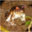

In [4]:
X_train[0]

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [19]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

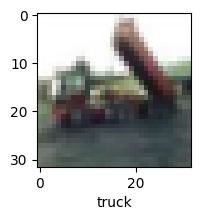

In [20]:
plot_sample(X_train, y_train, 2)

In [21]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [23]:

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8110 - accuracy: 0.3543
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6242 - accuracy: 0.4250
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5436 - accuracy: 0.4551
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4827 - accuracy: 0.4787
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4330 - accuracy: 0.4967


In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.46      0.52      1000
           1       0.63      0.59      0.61      1000
           2       0.42      0.30      0.35      1000
           3       0.30      0.41      0.35      1000
           4       0.56      0.26      0.35      1000
           5       0.35      0.42      0.38      1000
           6       0.51      0.57      0.54      1000
           7       0.45      0.65      0.53      1000
           8       0.61      0.64      0.62      1000
           9       0.57      0.54      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [25]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [26]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 10s 4ms/step - loss: 1.5023 - accuracy: 0.4605
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1469 - accuracy: 0.5993
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0174 - accuracy: 0.6447
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9384 - accuracy: 0.6726
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8788 - accuracy: 0.6935
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8234 - accuracy: 0.7127
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7883 - accuracy: 0.7253
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7443 - accuracy: 0.7412
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7068 - accuracy: 0.7547
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.67

In [28]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9614 - accuracy: 0.6876


[0.9613584280014038, 0.6876000165939331]

In [29]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

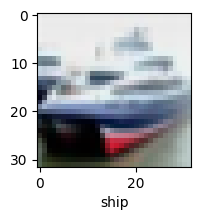

In [30]:
plot_sample(X_test, y_test, 1)

In [31]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[2.3537367e-03, 4.2734158e-04, 5.5214711e-03, 8.0977756e-01,
        2.5478387e-04, 1.5250039e-01, 1.2746564e-02, 6.8304616e-06,
        1.2853938e-02, 3.5573458e-03],
       [2.9956677e-03, 3.6356859e-03, 2.3814866e-06, 3.3114347e-08,
        2.7628453e-09, 1.8420067e-10, 1.6240937e-09, 3.6341168e-09,
        9.9333680e-01, 2.9536091e-05],
       [3.9241850e-02, 6.7651711e-02, 1.2121432e-03, 9.6015062e-04,
        6.3450556e-05, 6.0397884e-05, 1.7467184e-05, 6.9253510e-05,
        8.6604804e-01, 2.4675541e-02],
       [8.5779774e-01, 2.2973646e-03, 4.3064386e-02, 2.4286145e-03,
        3.7040733e-02, 1.9684483e-05, 1.0980758e-02, 2.6946020e-05,
        4.6321508e-02, 2.2327809e-05],
       [7.7572361e-07, 5.2551801e-05, 1.8068586e-03, 9.4324164e-03,
        7.4984294e-01, 5.1337987e-04, 2.3832469e-01, 4.0006476e-06,
        3.0859878e-06, 1.9392852e-05]], dtype=float32)

In [32]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

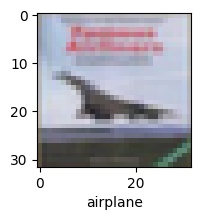

In [34]:

plot_sample(X_test, y_test,3)

In [35]:
classes[y_classes[3]]

'airplane'